# Cloud Counselage - Data Science Live Project

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For plotting visualizations
import matplotlib.pyplot as plt

# For exporting visualizations as pdf
from matplotlib.backends.backend_pdf import PdfPages

# For splitting dataset into training set and test set
from sklearn.model_selection import train_test_split 

# For computing cross validated metrics
from sklearn.model_selection import cross_validate

# For Support Vector Machine Classifier
from sklearn import svm

# For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#For K-Nearest Neighbor(KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier

#For Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv("DS_DATESET.csv")

# Printing shape of dataframe
print("Shape : ",df.shape)

# Printing column names
print("\nCoulmns : ",df.columns)

# Printing dataset 
df.head()

Shape :  (10000, 32)

Coulmns :  Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
       'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
       'Emergency Contact Number', 'College name', 'University Name', 'Degree',
       'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
       'Current Employment Status', 'Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Certifications/Achievement/ Research papers',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]',
       'Link to updated Resume (Google/ One Drive link preferred)',
       'link to Linkedin profile', 'How Did You Hear About This Internship?',
       'Label'],
      dtype='object')


,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


# Data Preprocessing

In [3]:
# Listing the required columns
required_columns=['City','College name','Major/Area of Study','Which-year are you studying in?','CGPA/ percentage','Areas of interest','Programming Language Known other than Java (one major)','Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]','How Did You Hear About This Internship?','Label']

# Extracting the required columns from dataset
df = df[required_columns]

# Printing shape of the obtained dataframe
print(df.shape)

# Printing the obtained dataframe 
df.head()

(10000, 11)


,City,College name,Major/Area of Study,Which-year are you studying in?,CGPA/ percentage,Areas of interest,Programming Language Known other than Java (one major),Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],How Did You Hear About This Internship?,Label
0,Kolhapur,DY Patil College of Engineering And Technology,Electrical Engineering,Second-year,7.26,Artificial Intelligence,HTML/CSS,6,10,Twitter,ineligible
1,Pune,Vishwakarma Institute of Information Technology,Electronics and Telecommunication,Fourth-year,8.73,Cloud Computing,PHP,10,7,Ex/Current Employee,eligible
2,Mumbai,Vidyalankar Institute of Technology,Electrical Engineering,Fourth-year,8.61,IoT,C,8,6,Twitter,ineligible
3,Solapur,Brahmdevdada Mane Institute of Technology,Computer Engineering,Second-year,7.96,Digital Marketing,PHP,9,6,Twitter,ineligible
4,Sangli,Rajarambapu Institute of Technology,Electrical Engineering,First-year,7.07,Cloud Computing,Python,8,6,Facebook,ineligible


In [4]:
# Checking each column for missing values  
for c in required_columns:
    # Storing number of missing values in a column into 'num_missing'
    num_missing = df[c].isnull().sum()
    if num_missing > 0:
        # Printing number of missing values if any 
        print(c,num_missing)
    else:
        # Printing 'No missing values' when 'num_missing' value is 0
        print(c,": No missing values")
        print(' ')

City : No missing values
 
College name : No missing values
 
Major/Area of Study : No missing values
 
Which-year are you studying in? : No missing values
 
CGPA/ percentage : No missing values
 
Areas of interest : No missing values
 
Programming Language Known other than Java (one major) : No missing values
 
Rate your written communication skills [1-10] : No missing values
 
Rate your verbal communication skills [1-10] : No missing values
 
How Did You Hear About This Internship? : No missing values
 
Label : No missing values
 


In [5]:
# Creating a dictionary to rename column names 
rename_dict={'Major/Area of Study':'Area of Study',
             'Which-year are you studying in?':'Current Year',
             'CGPA/ percentage':'CGPA',
             'Programming Language Known other than Java (one major)':'Programming Language',
             'Rate your written communication skills [1-10]':'Written communication skills',
             'Rate your verbal communication skills [1-10]':'Verbal communication skills'}

# Renaming column names
df.rename(columns = rename_dict, inplace = True) 

# Encoding the 'Label' column of dataframe
df["Label"] = df["Label"].replace({'eligible':1,'ineligible':0})

# Printing the obtained dataframe
df.head()

,City,College name,Area of Study,Current Year,CGPA,Areas of interest,Programming Language,Written communication skills,Verbal communication skills,How Did You Hear About This Internship?,Label
0,Kolhapur,DY Patil College of Engineering And Technology,Electrical Engineering,Second-year,7.26,Artificial Intelligence,HTML/CSS,6,10,Twitter,0
1,Pune,Vishwakarma Institute of Information Technology,Electronics and Telecommunication,Fourth-year,8.73,Cloud Computing,PHP,10,7,Ex/Current Employee,1
2,Mumbai,Vidyalankar Institute of Technology,Electrical Engineering,Fourth-year,8.61,IoT,C,8,6,Twitter,0
3,Solapur,Brahmdevdada Mane Institute of Technology,Computer Engineering,Second-year,7.96,Digital Marketing,PHP,9,6,Twitter,0
4,Sangli,Rajarambapu Institute of Technology,Electrical Engineering,First-year,7.07,Cloud Computing,Python,8,6,Facebook,0


# Data Visulizations

## 1. Number Of Students In Each Technology

In [6]:
# Creating new dataframe df1
df1 = df[["Areas of interest"]].copy()

# Adding new column to df1
df1["Number Of Students"] = 1

# Grouping df1 based on 'Areas of interest' and counting number of students in each group
df1 = df1.groupby("Areas of interest").sum()

# Resetting df1 index
df1 = df1.reset_index()

# Sorting in descending order
df1.sort_values(by=['Number Of Students'], inplace=True, ascending=False)

# Printing df1
df1

,Areas of interest,Number Of Students
6,DevOps,674
10,Machine Learning,671
12,Python,652
4,Cyber Security,638
15,Web Development,637
13,QMS/Testing,633
11,Mobility,631
9,IoT,630
0,Artificial Intelligence,627
7,Digital Marketing,624


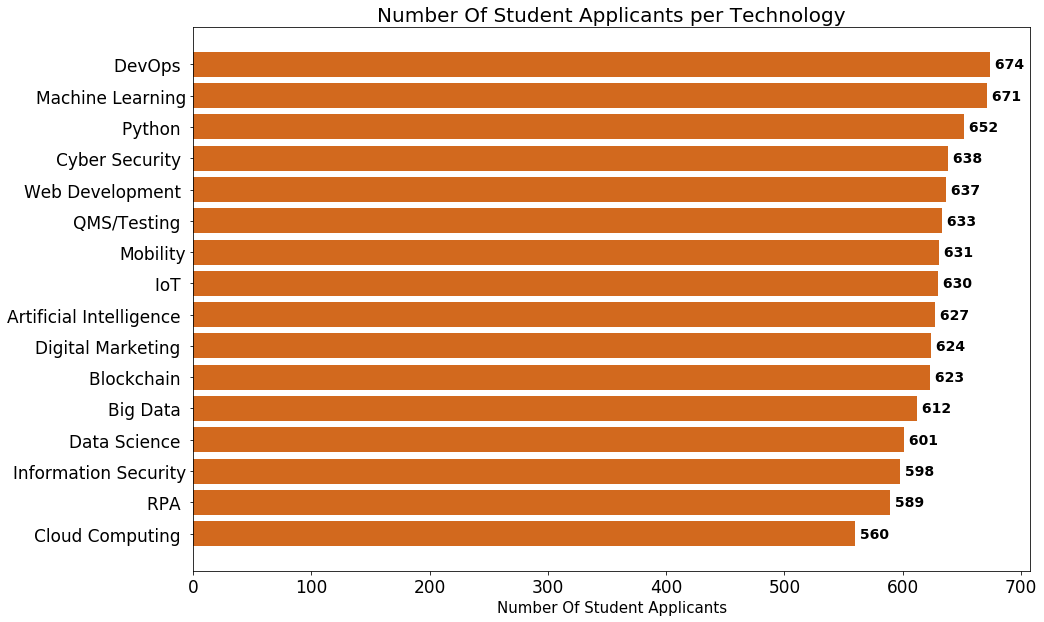

In [7]:
# Plotting results using a horizontal bar graph

plt.rcParams["figure.figsize"]= 15,10
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots()

# Defining x and y axes
x = df1["Areas of interest"]
y = df1["Number Of Students"]

x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , align='center',color="chocolate")

# Adding labels
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_xlabel('Number Of Student Applicants',fontsize=15)
ax.set_title('Number Of Student Applicants per Technology',fontsize=20)

# Because labels read top to bottom
ax.invert_yaxis()  

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold',fontsize=14)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot1.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

## 2. Python Knowledge Of Students Who Applied For Data Science

In [8]:
# Creating new dataframe df_DataScience
df_DataScience = df[df['Areas of interest'] =='Data Science ']

# 'Total' consists of number of students who applied for Data Science
Total = len(df_DataScience)

# 'Python_Count' consists of number of students who applied for Data Science and who knew Python
Python_Count = df_DataScience[df_DataScience['Programming Language'] == 'Python'].count()['Programming Language']

# 'NoPython_Count' consists of number of students who applied for Data Science and who didn't knew Python 
NoPython_Count = Total - Python_Count

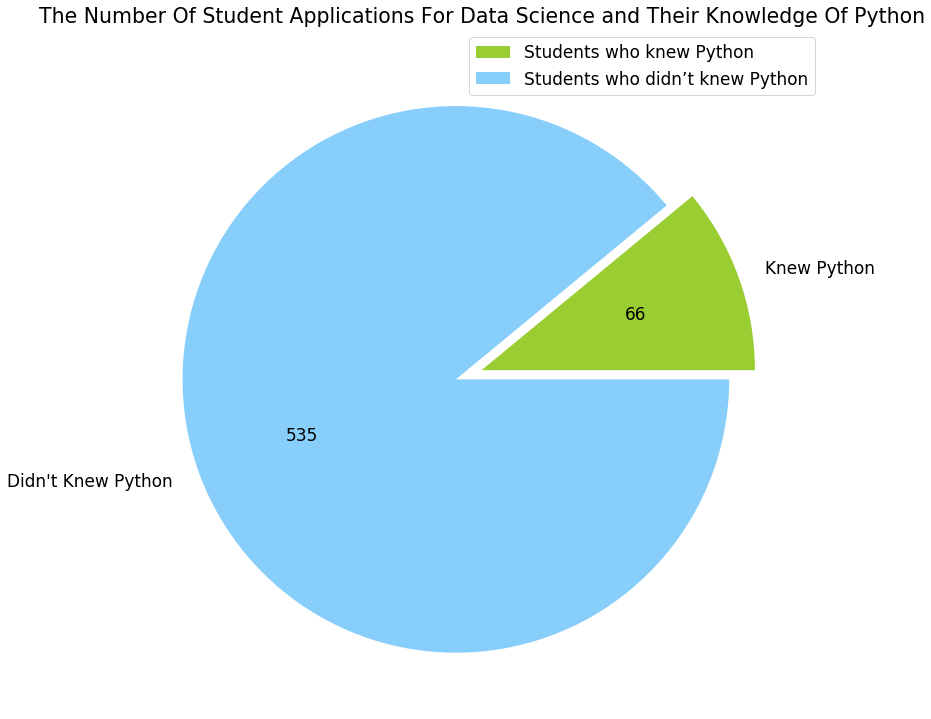

In [9]:
# Plotting obtained results using a pie chart
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots()

# Function to add count of students on pie chart
def func(x,allvals):
    absolute = int(round((x/100.*np.sum(allvals))))
    return "{:d}".format(absolute)

# Defining label for legend
labels = [r'Students who knew Python', r'Students who didn’t knew Python']

# Defining colors for chart
colors = ['yellowgreen','lightskyblue']

# Plotting pie chart
ax.pie([Python_Count,NoPython_Count],labels = ['Knew Python','Didn\'t Knew Python'],colors=colors,autopct= lambda x : func(x,[Python_Count,NoPython_Count]),explode=[0,0.1])
# ax.axis('equal')

# Adding legend to chart
ax.legend(labels)

# Adding title to chart
plt.tight_layout()
plt.title("The Number Of Student Applications For Data Science and Their Knowledge Of Python")

# Exporting the obtained visualization as pdf
pp = PdfPages('plot2.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

# 3. Different Ways Students Learned About Internship Program 

In [10]:
# Creating new dataframe s by grouping different ways students heard about this internship
s = df.groupby(df["How Did You Hear About This Internship?"])["How Did You Hear About This Internship?"].count()

# Sorting in descending order
s=s.sort_values(ascending = False)
print(s)

# Defining label for graph
labels = list(s.keys())

# 'x' consists of label locations
x = np.arange(len(labels))  

# Defining y axis for bar graph
y = list(s.values)

How Did You Hear About This Internship?
Intern                 1173
Newspaper              1162
Twitter                1160
Blog post              1116
LinkedIn               1112
Friend                 1109
Facebook               1084
Other                  1077
Ex/Current Employee    1007
Name: How Did You Hear About This Internship?, dtype: int64


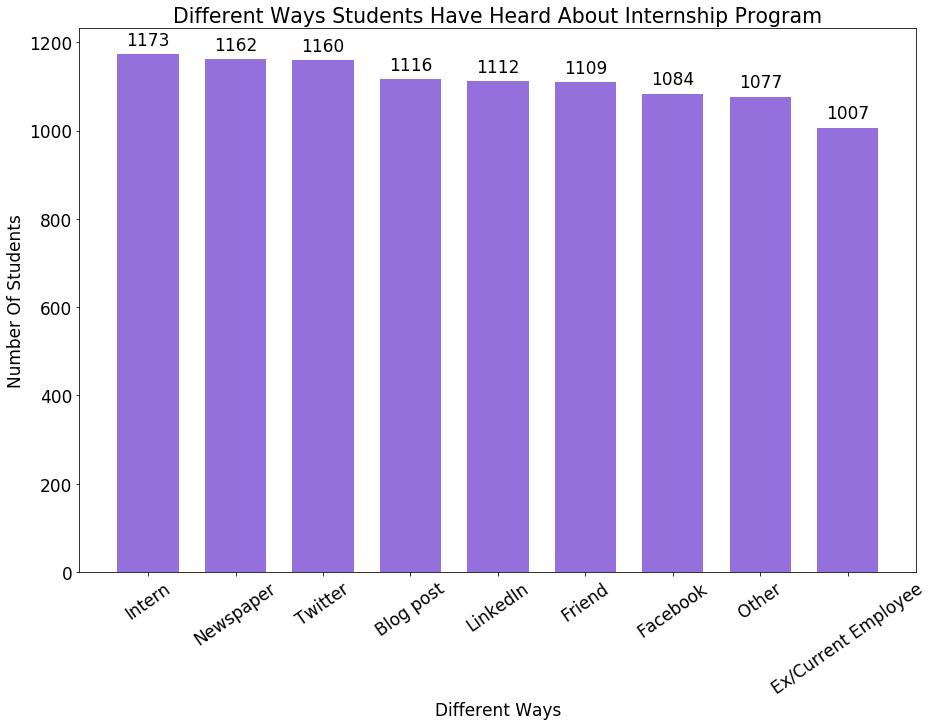

In [11]:
# Plotting obtained results using a bar graph
plt.rcParams["figure.figsize"]= 15,10
fig, ax = plt.subplots()

# Defining width of the bars
width = 0.7  

# Plotting bar graph
rect = ax.bar(x,y,width,align='center',color='mediumpurple')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Different Ways')
ax.set_title('Different Ways Students Have Heard About Internship Program')
ax.set_ylabel('Number Of Students')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=35)

# Function for attaching a text label above each bar in graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot3.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

## 4. CGPA Range Of Students In The Fourth Year

In [12]:
# Creating new dataframe consisting of only Fourth year students
count = df[df["Current Year"] == "Fourth-year"]

# Counting the number of fourth year students who have CGPA less than 8
less_than8 = count[count["CGPA"] < 8][["CGPA"]]["CGPA"].count()

# Counting the number of fourth year students who have CGPA in between 8 to 9
eight_nine = count[(count["CGPA"] >= 8) & (count["CGPA"] < 9)]["CGPA"].count()

# Counting the number of fourth year students who have CGPA in between 9 to 10
nine_ten = count[(count["CGPA"] >= 9) & (count["CGPA"] <= 10)]["CGPA"].count()

print("The number of fourth year students who have CGPA less than 8 : ",less_than8)
print("The number of fourth year students who have CGPA in between 8 to 9 : ",eight_nine)
print("The number of fourth year students who have CGPA in between 9 to 10 : ",nine_ten)

The number of fourth year students who have CGPA less than 8 :  773
The number of fourth year students who have CGPA in between 8 to 9 :  833
The number of fourth year students who have CGPA in between 9 to 10 :  871


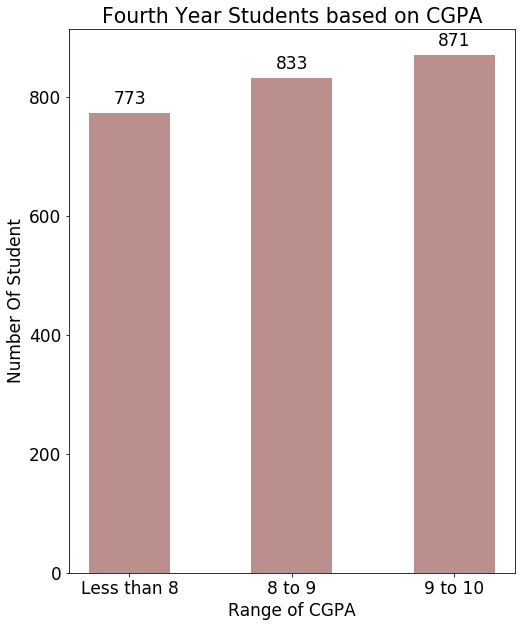

In [13]:
# Plotting obtained results using a bar graph
plt.rcParams["figure.figsize"]= 8,10
fig, ax = plt.subplots()

# Defining x and y axes
x = ['Less than 8' , '8 to 9' ,'9 to 10']
y = [less_than8,eight_nine,nine_ten]

# Plotting bar graph
rect=plt.bar(x, y,0.5,color='rosybrown')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Range of CGPA')
ax.set_ylabel('Number Of Student')
ax.set_title('Fourth Year Students based on CGPA')
autolabel(rect)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot4.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

## 5. Verbal And Written Communication Skills Score For Students Who Applied For Digital Marketing

In [14]:
# Creating new dataframe consisting of students who applied for Digital Marketing
digital_marketing = df[df["Areas of interest"]=="Digital Marketing "]

# Counting the number of students who have Verbal communication skills score greater than 8
verbal=digital_marketing[(digital_marketing["Verbal communication skills"] > 8)]

# Counting the number of students who have Written communication skills score greater than 8
written=digital_marketing[(digital_marketing["Written communication skills"] > 8)]

# Counting the number of students who have Written and Verbal communication skills score greater than 8
both=digital_marketing[(digital_marketing["Verbal communication skills"] > 8) &  (digital_marketing["Written communication skills"] > 8)]

print("The number total number of students in Digital Marketing : ",len(digital_marketing))
print("The number of students who have Verbal communication skills score greater than 8 : ",len(verbal))
print("The number of students who have Written communication skills score greater than 8 : ",len(written))
print("The number of students who have Written and Verbal communication skills score greater than 8 : ",len(both))

The number total number of students in Digital Marketing :  624
The number of students who have Verbal communication skills score greater than 8 :  251
The number of students who have Written communication skills score greater than 8 :  256
The number of students who have Written and Verbal communication skills score greater than 8 :  92


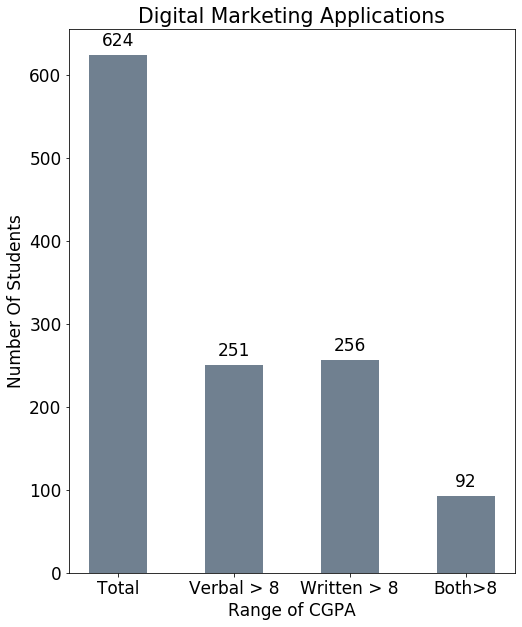

In [15]:
# Plotting obtained results using a bar graph
plt.rcParams["figure.figsize"]= 8,10
fig, ax = plt.subplots()

# Defining x and y axes
x = ['Total','Verbal > 8' , 'Written > 8' ,'Both>8']
y = [len(digital_marketing),len(verbal),len(written),len(both)]

# Plotting bar graph
rect=plt.bar(x, y,0.5,color='slategrey')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Range of CGPA')
ax.set_ylabel('Number Of Students')
ax.set_title('Digital Marketing Applications')
autolabel(rect)

# Exporting the obtained visualization as df
pp = PdfPages('plot5.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

## 6. Classification Of Students Based On Year & Area Of Study

In [16]:
# Creating new dataframe based on year of study and area of study
year_area = df[["Current Year","Area of Study","City"]].copy()

# Replacing values in 'Current Year' column
year_area['Current Year'] = year_area['Current Year'].replace({'First-year':'1st Year', 'Second-year':'2nd Year', 'Third-year':'3rd Year', 'Fourth-year':'4th Year'})

# Grouping year_area based on 'Current Year' and 'Area of Study' and counting number of students in each group
year_area = year_area.groupby(["Current Year","Area of Study"],as_index=False)['City'].count()
year_area

,Current Year,Area of Study,City
0,1st Year,Computer Engineering,1470
1,1st Year,Electrical Engineering,490
2,1st Year,Electronics and Telecommunication,550
3,2nd Year,Computer Engineering,1536
4,2nd Year,Electrical Engineering,518
5,2nd Year,Electronics and Telecommunication,496
6,3rd Year,Computer Engineering,1449
7,3rd Year,Electrical Engineering,561
8,3rd Year,Electronics and Telecommunication,453
9,4th Year,Computer Engineering,1516


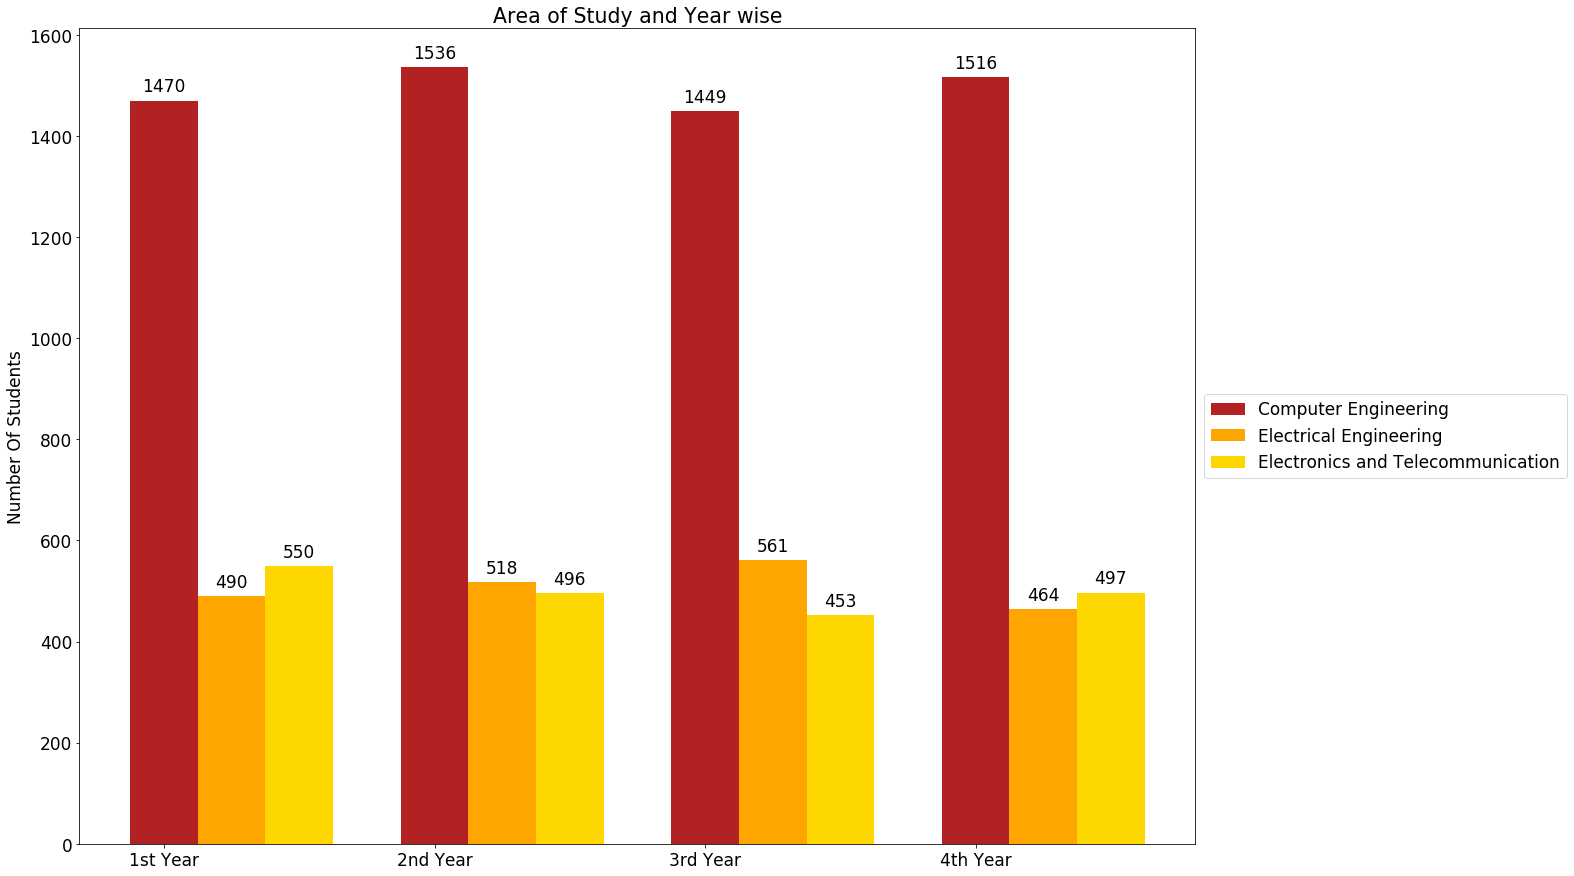

In [17]:
# Plotting obtained results using a bar graph
plt.rcParams["figure.figsize"]= 20,15
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots()

# Defining labels for x axis
labels = year_area["Current Year"].unique()

# Defining the label locations
x = np.arange(len(labels)) 

# Defining width of the bars
width = 0.25

# Defining y axis values for each group
y1 = year_area[year_area["Area of Study"] == "Computer Engineering" ]["City"]
y2 = year_area[year_area["Area of Study"] == "Electrical Engineering" ]["City"]
y3 = year_area[year_area["Area of Study"] == "Electronics and Telecommunication" ]["City"]

# Plotting bar graph for all three groups
rects1 = ax.bar(x + 0.0 , y1, width, label='Computer Engineering',align='center',color='firebrick')
rects2 = ax.bar(x + 0.25 , y2, width, label='Electrical Engineering',align='center',color='orange')
rects3 = ax.bar(x + 0.5 , y3, width, label='Electronics and Telecommunication',align='center',color='gold')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Area of Study and Year wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Function for attaching a text label above each bar in graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attaching text to each group
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot6.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

## 7. Classification Of Students Based On City & College

In [18]:
# Creating new copy of dataframe based on city and college of student applicants
city_college = df[["College name","City","Area of Study"]].copy()

# Grouping city_college based on 'City' and 'College name' and counting number of students in each group
city_college = city_college.groupby(["City","College name"],as_index=False)['Area of Study'].count()
city_college

,City,College name,Area of Study
0,Kolhapur,Bharati Vidyapeeth College of Engineering,834
1,Kolhapur,DY Patil College of Engineering And Technology,813
2,Mumbai,K. J. Somaiya College of Engineering,220
3,Mumbai,Rajiv Gandhi Institute of Technology,201
4,Mumbai,Rizvi College of Engineering,222
5,Mumbai,St. Francis Institute of Technology,189
6,Mumbai,Thadomal Shahani Engineering College,192
7,Mumbai,Thakur College Of Engineering And Technology,206
8,Mumbai,Vidyalankar Institute of Technology,207
9,Mumbai,Xavier Institute of Engineering,211


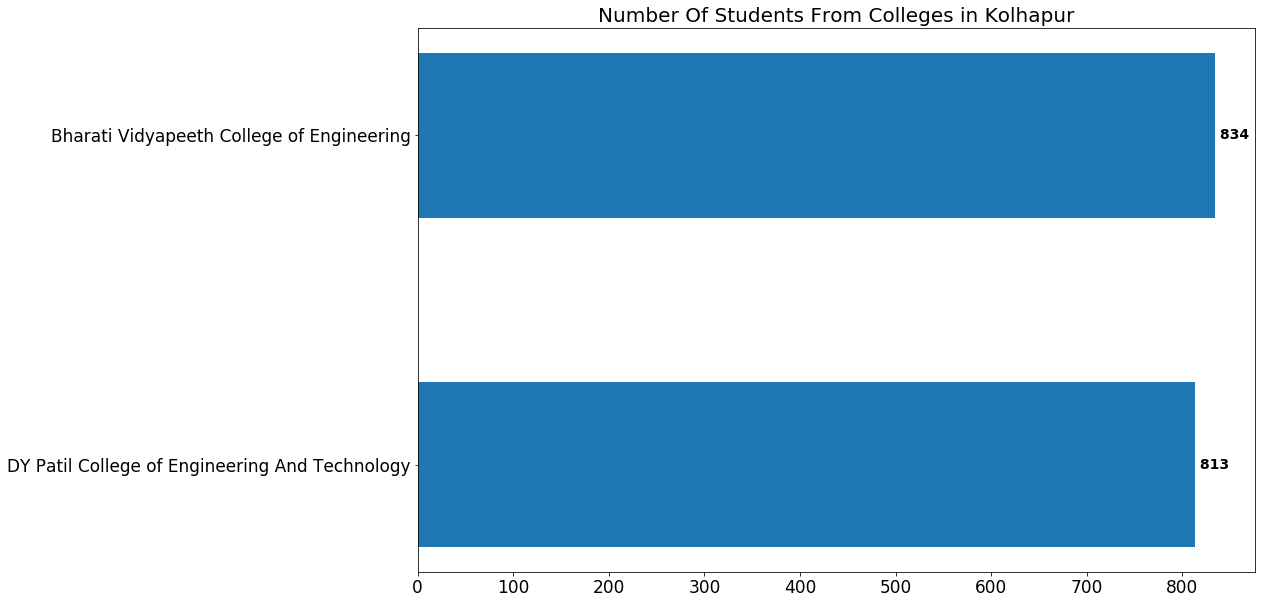

In [19]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,10
fig, ax = plt.subplots()

# Selecting colleges located in Kolhapur
plot1=city_college[city_college['City']=="Kolhapur"]

# Sorting the number of students count in descending manner
plot1 = plot1.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot1["College name"]
y=plot1["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , 0.5,align='center')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in Kolhapur',fontsize=20)

# Because labels read top to bottom
ax.invert_yaxis() 

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold',fontsize=14)


# Exporting the obtained visualization as pdf
pp = PdfPages('plot7a.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

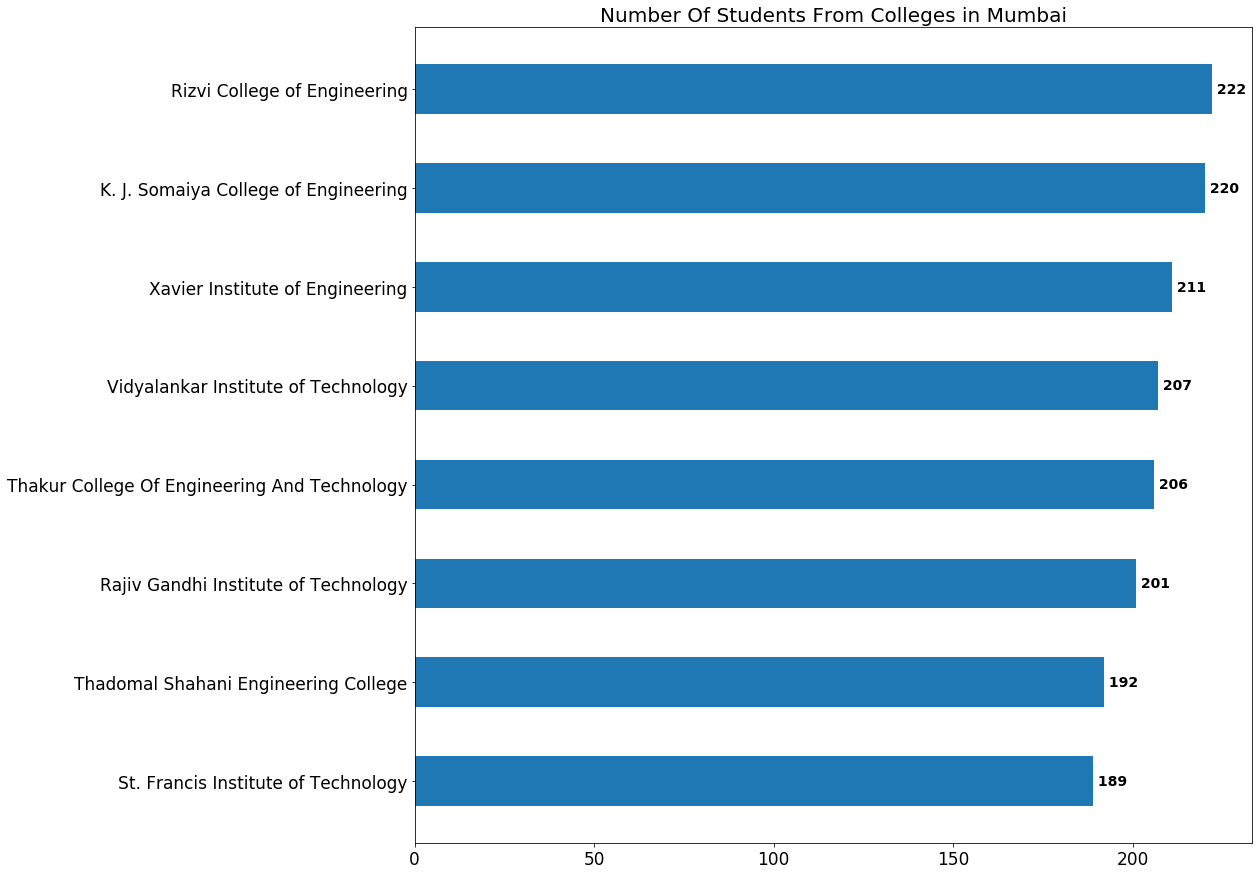

In [20]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,15
fig, ax = plt.subplots()

# Selecting colleges located in Mumbai
plot2=city_college[city_college['City']=="Mumbai"]

# Sorting the number of students count in descending manner
plot2 = plot2.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot2["College name"]
y=plot2["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , 0.5,align='center')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in Mumbai',fontsize=20)

# Because labels read top to bottom
ax.invert_yaxis() 

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold',fontsize=14)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot7b.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

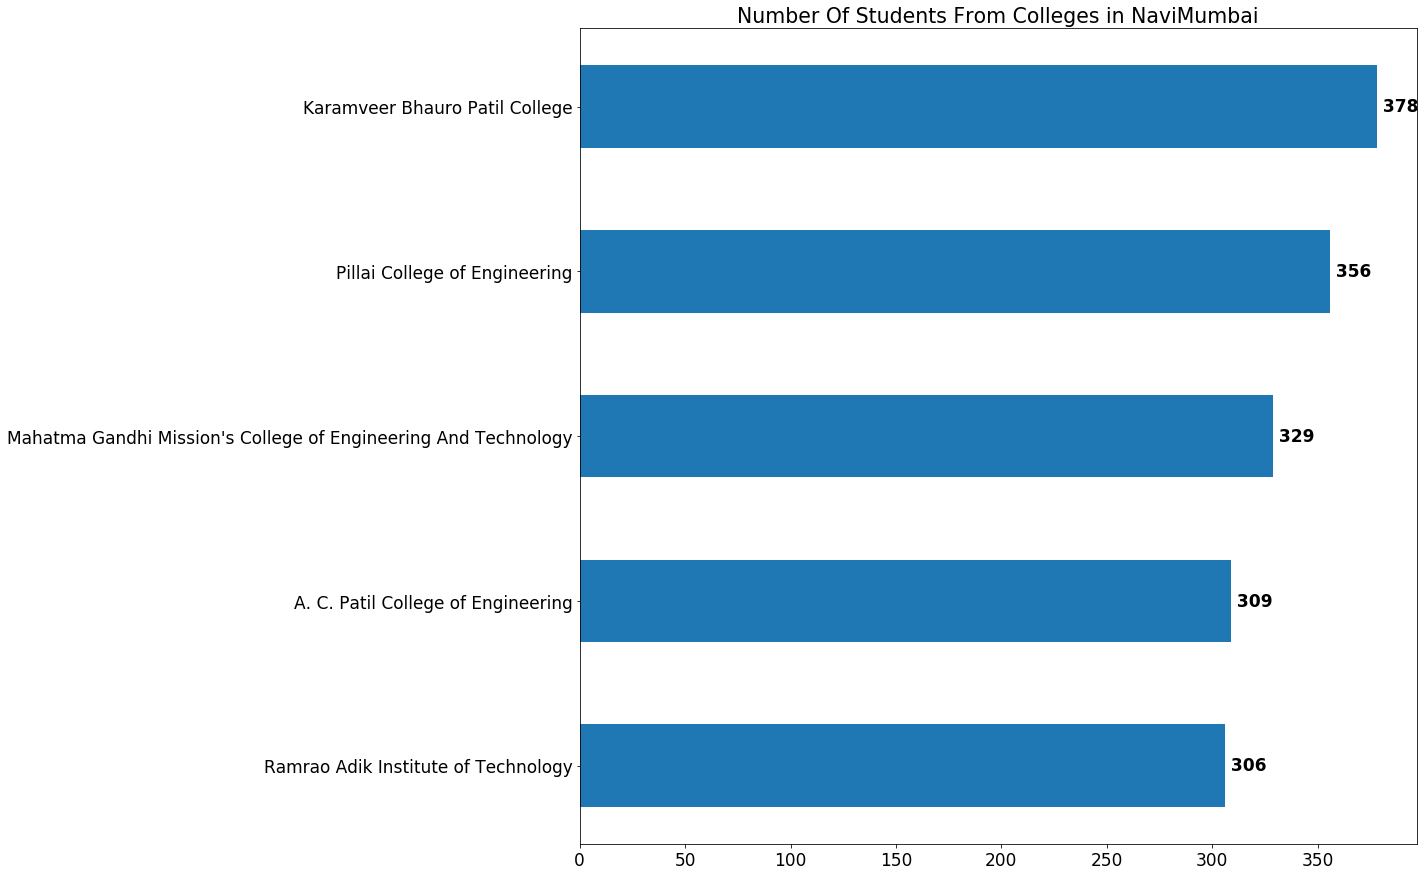

In [20]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,15
fig, ax = plt.subplots()

# Selecting colleges located in Navi Mumbai
plot3=city_college[city_college['City']=="NaviMumbai"]

# Sorting the number of students count in descending manner
plot3 = plot3.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot3["College name"]
y=plot3["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , 0.5,align='center')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in NaviMumbai')

# Because labels read top to bottom
ax.invert_yaxis()  

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

# Exporting the obtained visualization as pdf
pp = PdfPages('plot7c.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

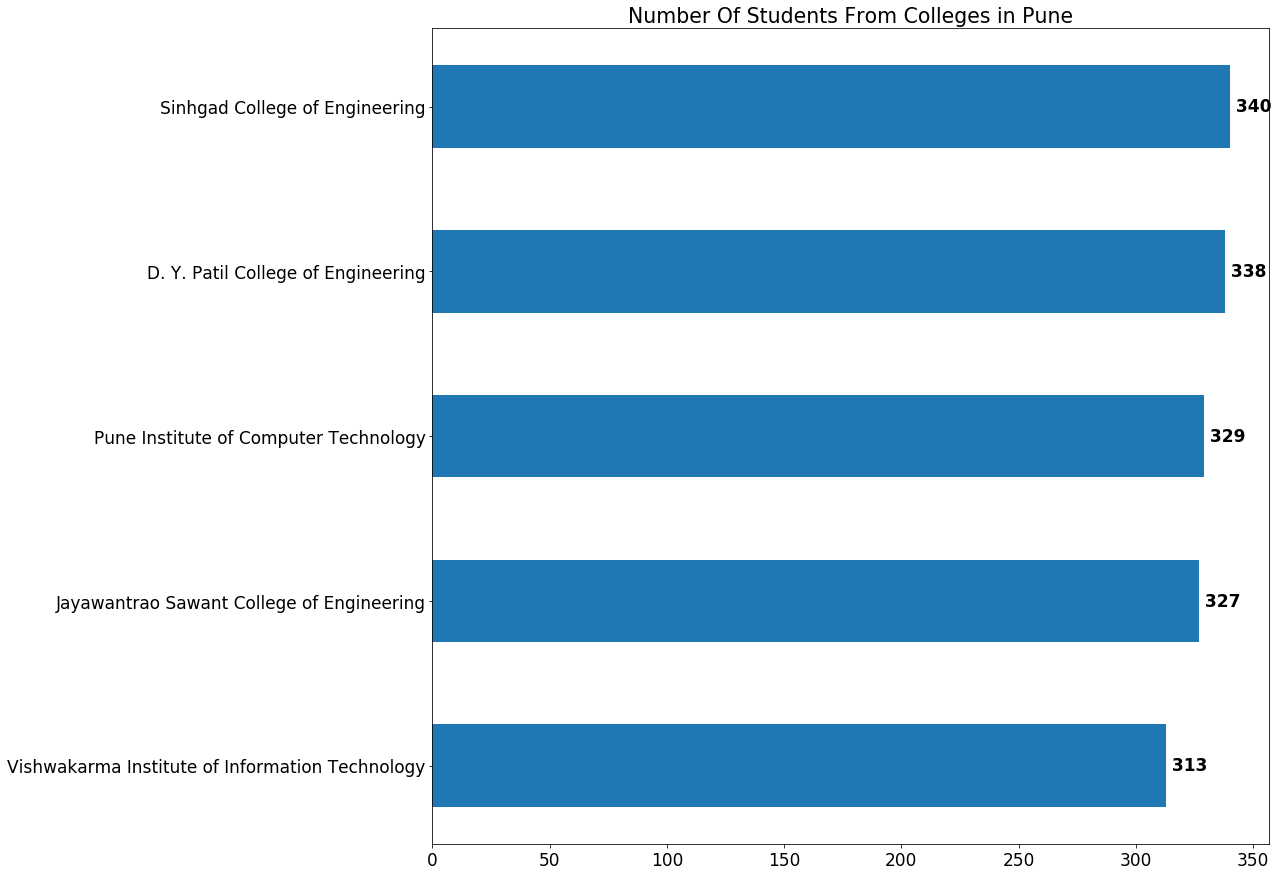

In [21]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,15
fig, ax = plt.subplots()

# Selecting colleges located in Pune
plot4=city_college[city_college['City']=="Pune"]

# Sorting the number of students count in descending manner
plot4 = plot4.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot4["College name"]
y=plot4["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , 0.5,align='center',)

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in Pune')

# Because labels read top to bottom
ax.invert_yaxis()  

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

# Exporting the obtained visualization as pdf
pp = PdfPages('plot7d.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

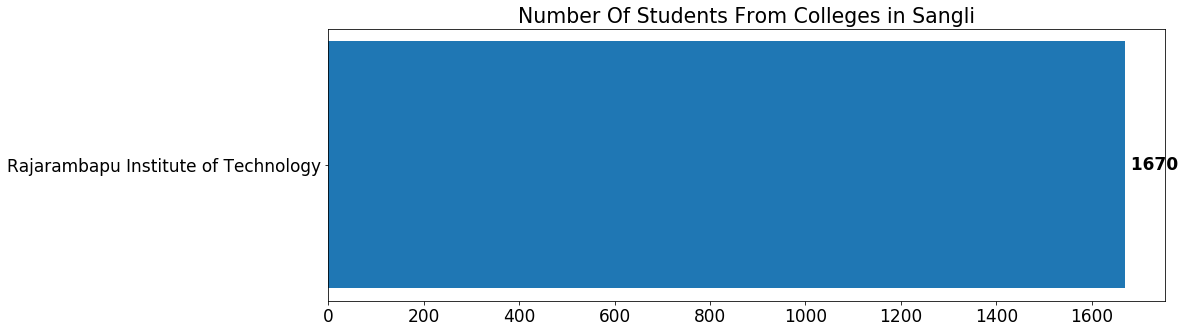

In [22]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,5
fig, ax = plt.subplots()

# Selecting colleges located in Sangli
plot5=city_college[city_college['City']=="Sangli"]

# Sorting the number of students count in descending manner
plot5 = plot5.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot5["College name"]
y=plot5["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y ,align='center')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in Sangli')

# Because labels read top to bottom
ax.invert_yaxis() 

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

# Exporting the obtained visualization as pdf
pp = PdfPages('plot7e.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

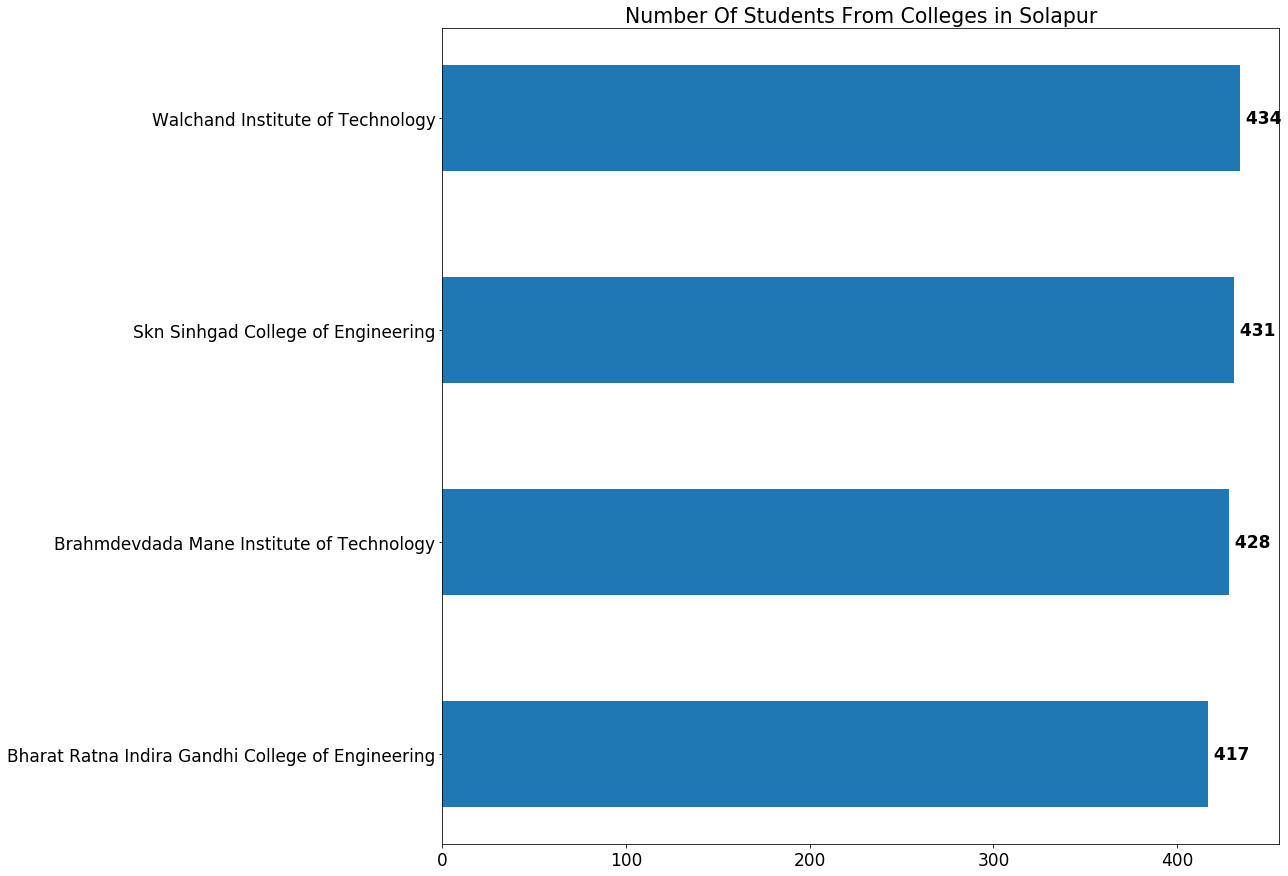

In [23]:
# Plotting results obtained using a horizontal bar graph
plt.rcParams["figure.figsize"]= 15,15
fig, ax = plt.subplots()

# Selecting colleges located in Solapur
plot6=city_college[city_college['City']=="Solapur"]

# Sorting the number of students count in descending manner
plot6 = plot6.sort_values(by=['Area of Study'], ascending=False)

# Defining x and y axes
x=plot6["College name"]
y=plot6["Area of Study"]

# Defining positions for labels for both axes
x_pos = np.arange(len(x))
y_pos = np.arange(len(y))

# Plotting horizontal bar graph
ax.barh(y_pos, y , 0.5,align='center')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.set_title('Number Of Students From Colleges in Solapur')

# Because labels read top to bottom
ax.invert_yaxis()  

# Attaching text values near each bar
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), va='center', fontweight='bold')

# Exporting the obtained visualization as pdf
pp = PdfPages('plot7f.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

## 8. Relationship Between CGPA And Eligibilty Of Students 

In [24]:
# Creating new copy of dataframe based on CGPA and Target column:'Label'
CGPA_target = df[["CGPA","Label"]].copy()

# Creating dataframe consisting of only eligible students
eligible = CGPA_target[CGPA_target["Label"]==1]

# Creating dataframe consisting of only ineligible students
ineligible = CGPA_target[CGPA_target["Label"]==0]

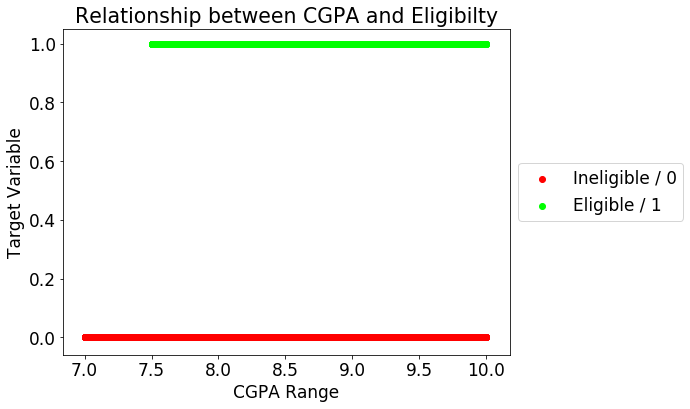

In [25]:
# Plotting the results obtained using scatter plot
plt.rcParams["figure.figsize"] = 8,6
fig, ax = plt.subplots()

# Plotting scatter plot for ineligible students
ax.scatter(ineligible["CGPA"], ineligible["Label"],color='r',label="Ineligible / 0")

# Plotting scatter plot for ineligible students
ax.scatter(eligible["CGPA"], eligible["Label"],color='lime',label="Eligible / 1")

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('CGPA Range')
ax.set_ylabel('Target Variable')
ax.set_title('Relationship between CGPA and Eligibilty')

# Adding legend for scatter plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Exporting the obtained visualization as pdf
pp = PdfPages('plot8.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

## 9. Relationship Between Area Of Interest And Eligibility

In [26]:
# Creating new copy of dataframe based on Areas of interest and Target column:'Label'
Technology_Target = df[['Areas of interest','Label','City']].copy()

# Creating dataframe consisting of only eligible students
eligible = Technology_Target[Technology_Target["Label"]==1]

# Creating dataframe consisting of only ineligible students
ineligible = Technology_Target[Technology_Target["Label"]==0]

# Grouping eligible based on 'Areas of interest' and 'Label' and counting number of students in each group
eligible = eligible.groupby(['Areas of interest','Label'],as_index=False).count()

# Grouping ineligible based on 'Areas of interest' and 'Label' and counting number of students in each group
ineligible = ineligible.groupby(['Areas of interest','Label'],as_index=False).count()

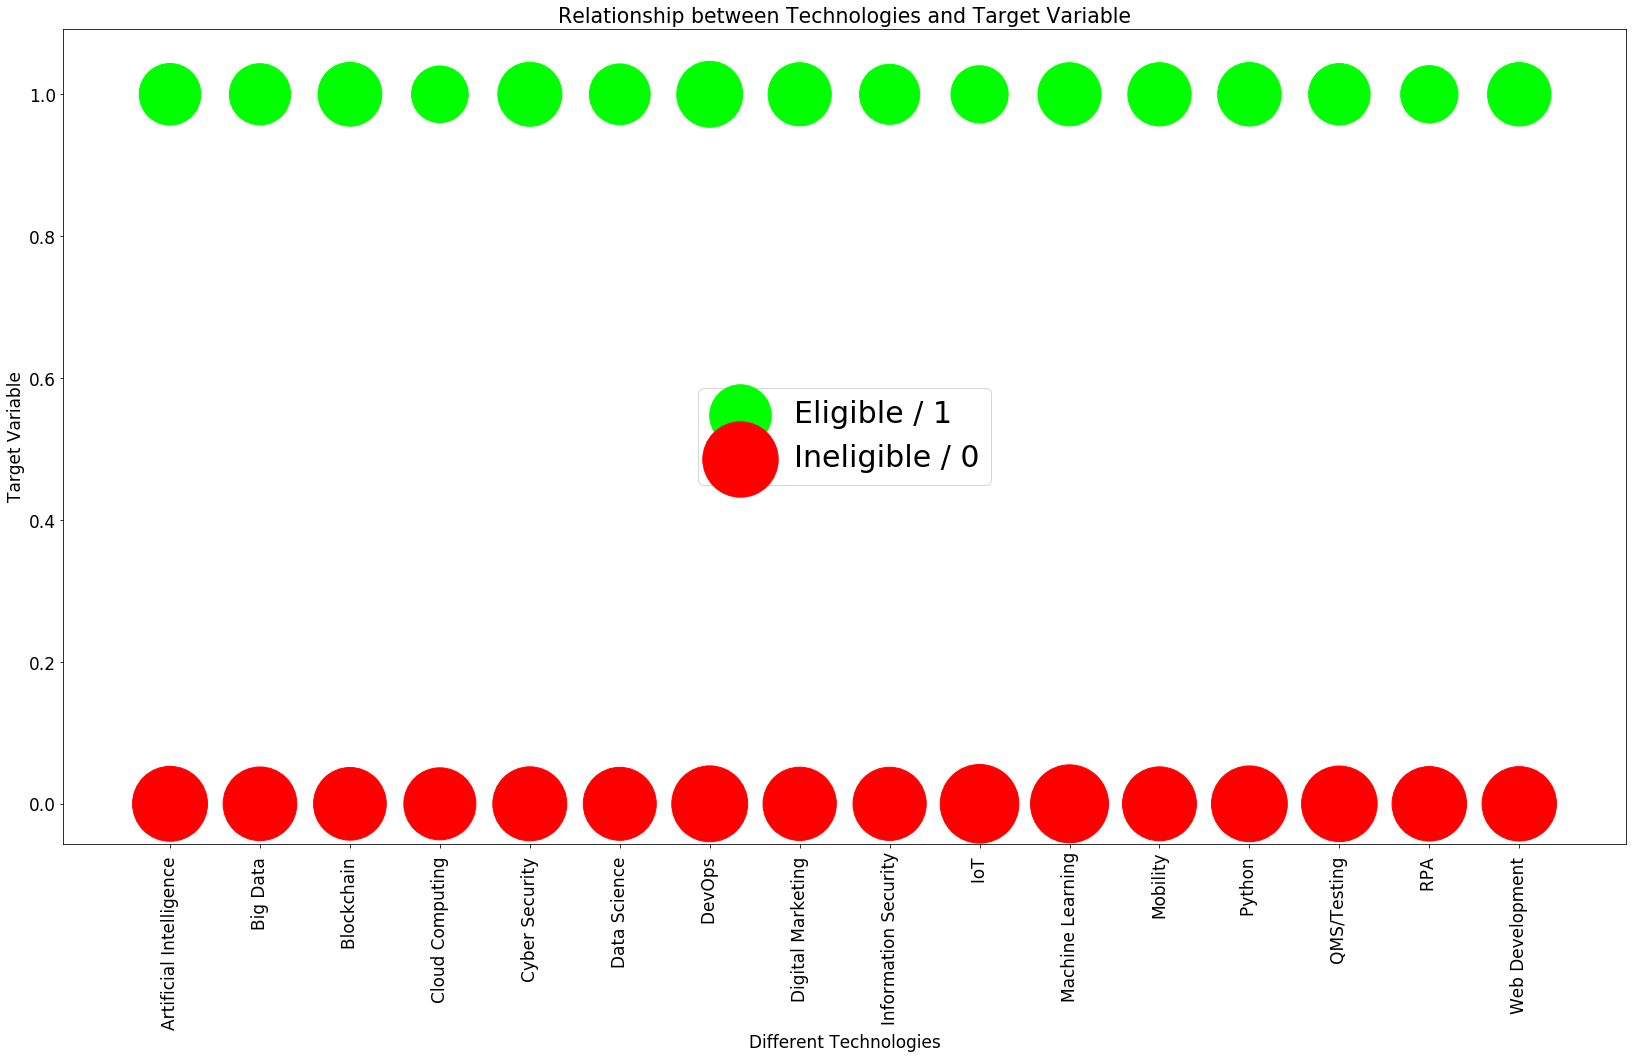

In [27]:
# Plotting the results obtained using scatter plot
plt.rcParams["figure.figsize"] = 28,15
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots()

# Defining labels for x axis
labels=eligible["Areas of interest"].unique()

# Defining the label locations
x=np.arange(len(labels))

# Plotting scatter plot for eligible students
plt.scatter(eligible['Areas of interest'], eligible['Label'],s=eligible['City']*15,label="Eligible / 1",color='lime')

# Plotting scatter plot for ineligible students
plt.scatter(ineligible['Areas of interest'],ineligible['Label'],s=ineligible['City']*15,label="Ineligible / 0",color='r')

# Adding legend for scatter plot
ax.legend(loc='center', prop={'size': 30})

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Different Technologies')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel('Target Variable')
ax.set_title('Relationship between Technologies and Target Variable')

# Exporting the obtained visualization as pdf
pp = PdfPages('plot9.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
pp.close()

## 10. Relationship Between Area of Study, Year Of Study And Eligibility

In [28]:
# Creating new copy of dataframe based on Areas of study, Current Year and Target column:'Label'
major_area = df[["City","Area of Study","Current Year","Label"]].copy()

# Replacing values in the column 'Current Year'
major_area['Current Year'] = major_area['Current Year'].replace({'First-year':'1st Year', 'Second-year':'2nd Year', 'Third-year':'3rd Year', 'Fourth-year':'4th Year'})

# Grouping major_area based on 'Areas of Study','Current Year' and 'Label' and counting number of students in each group
major_area = major_area.groupby(["Current Year","Area of Study","Label"],as_index=False).count()
major_area

,Current Year,Area of Study,Label,City
0,1st Year,Computer Engineering,0,1470
1,1st Year,Electrical Engineering,0,490
2,1st Year,Electronics and Telecommunication,0,550
3,2nd Year,Computer Engineering,0,718
4,2nd Year,Computer Engineering,1,818
5,2nd Year,Electrical Engineering,0,244
6,2nd Year,Electrical Engineering,1,274
7,2nd Year,Electronics and Telecommunication,0,223
8,2nd Year,Electronics and Telecommunication,1,273
9,3rd Year,Computer Engineering,0,648


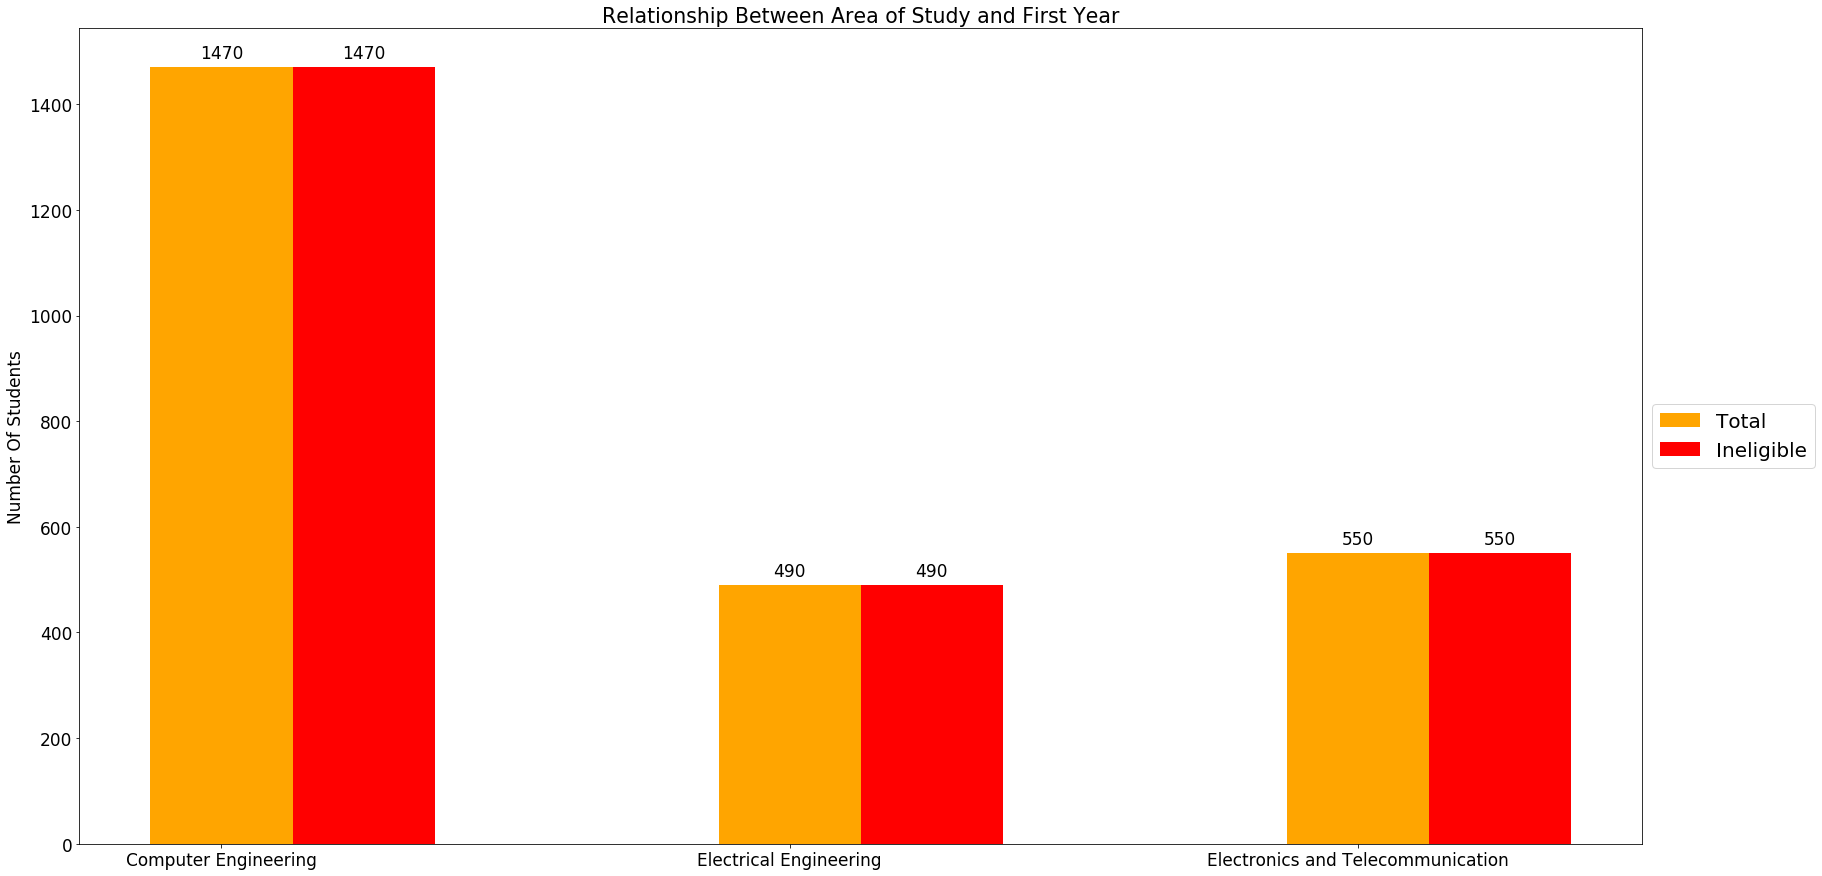

In [29]:
# Selecting First Year Students from dataframe
First = major_area[major_area["Current Year"] == '1st Year']

# Calculating total number of first year students in 'Computer Engineering'
total_comp = First[First["Area of Study"]=="Computer Engineering"]["City"].sum()

# Calculating total number of first year students in 'Electrical Engineering'
total_elec = First[First["Area of Study"]=="Electrical Engineering"]["City"].sum()

# Calculating total number of first year students in 'Electronics and Telecommunication'
total_extc = First[First["Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

# Plotting results obtained using a bar graph
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 15,15
plt.rcParams.update({'font.size': 17})

# Defining labels for x axis
labels=First["Area of Study"].unique()

# Defining the label locations
x = np.arange(len(labels))

# Defining width of the bars
width = 0.25  

# Defining y axis values for each group
y1 = First[First["Label"] == 0]["City"]
y2 = [total_comp,total_elec,total_extc]

# Plotting bar graph for both groups
rects2 = ax.bar(x , y2, width, label='Total',align='center',color='orange')
rects1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Relationship Between Area of Study and First Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})

# Attaching text to each group
autolabel(rects1)
autolabel(rects2)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot9a.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

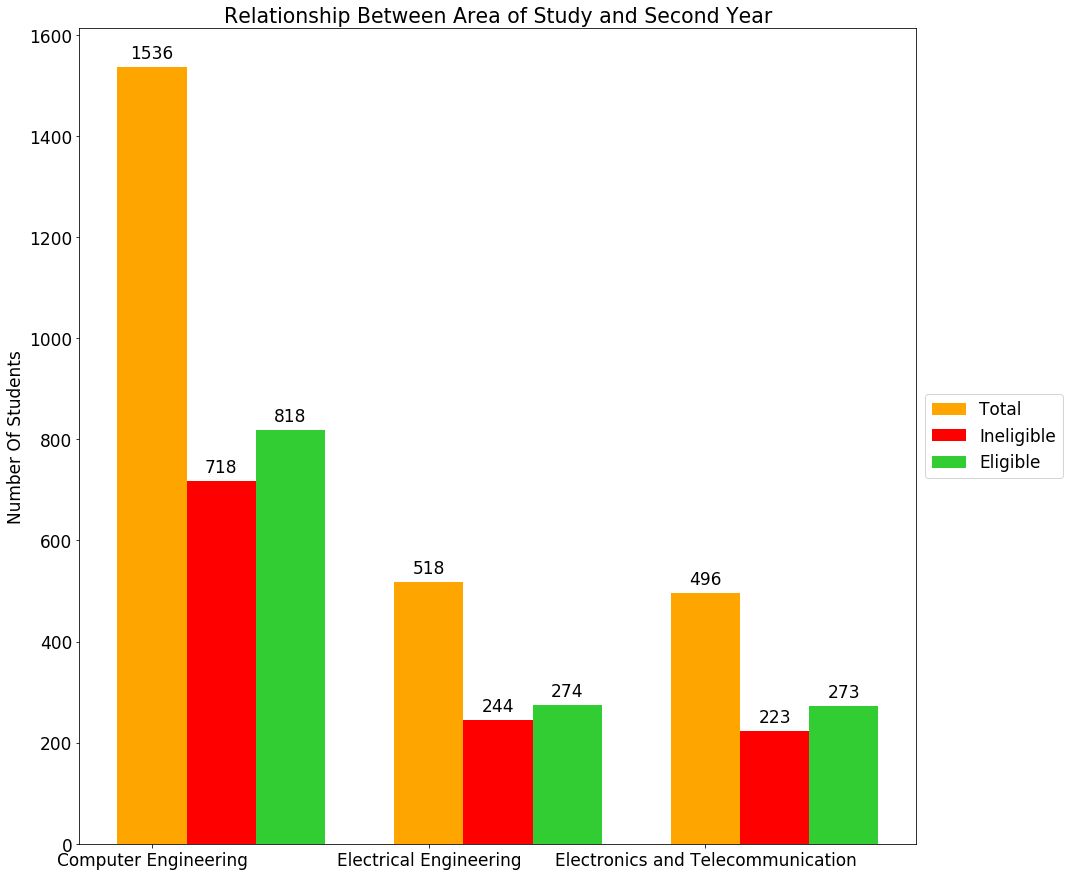

In [30]:
# Selecting Second Year Students from dataframe
Second = major_area[major_area["Current Year"] == '2nd Year']

# Calculating total number of second year students in 'Computer Engineering'
total_comp = Second[Second["Area of Study"]=="Computer Engineering"]["City"].sum()

# Calculating total number of second year students in 'Electrical Engineering'
total_elec = Second[Second["Area of Study"]=="Electrical Engineering"]["City"].sum()

# Calculating total number of second year students in 'Electronics and Telecommunication'
total_extc = Second[Second["Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

# Plotting results obtained using a bar graph
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 15,15
plt.rcParams.update({'font.size': 17})

# Defining labels for x axis
labels=Second["Area of Study"].unique()

# Defining the label locations
x = np.arange(len(labels)) 

# Defining width of the bars
width = 0.25  

# Defining y axis values for each group
y1 = Second[Second["Label"] == 0]["City"]
y2 = Second[Second["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]

# Plotting bar graph for all three groups
rects3 = ax.bar(x , y3, width, label='Total',align='center',color='orange')
rects1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='red')
rects2 = ax.bar(x + 0.5 , y2, width, label='Eligible',align='center',color='limegreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Relationship Between Area of Study and Second Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Attaching text to each group
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot9b.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

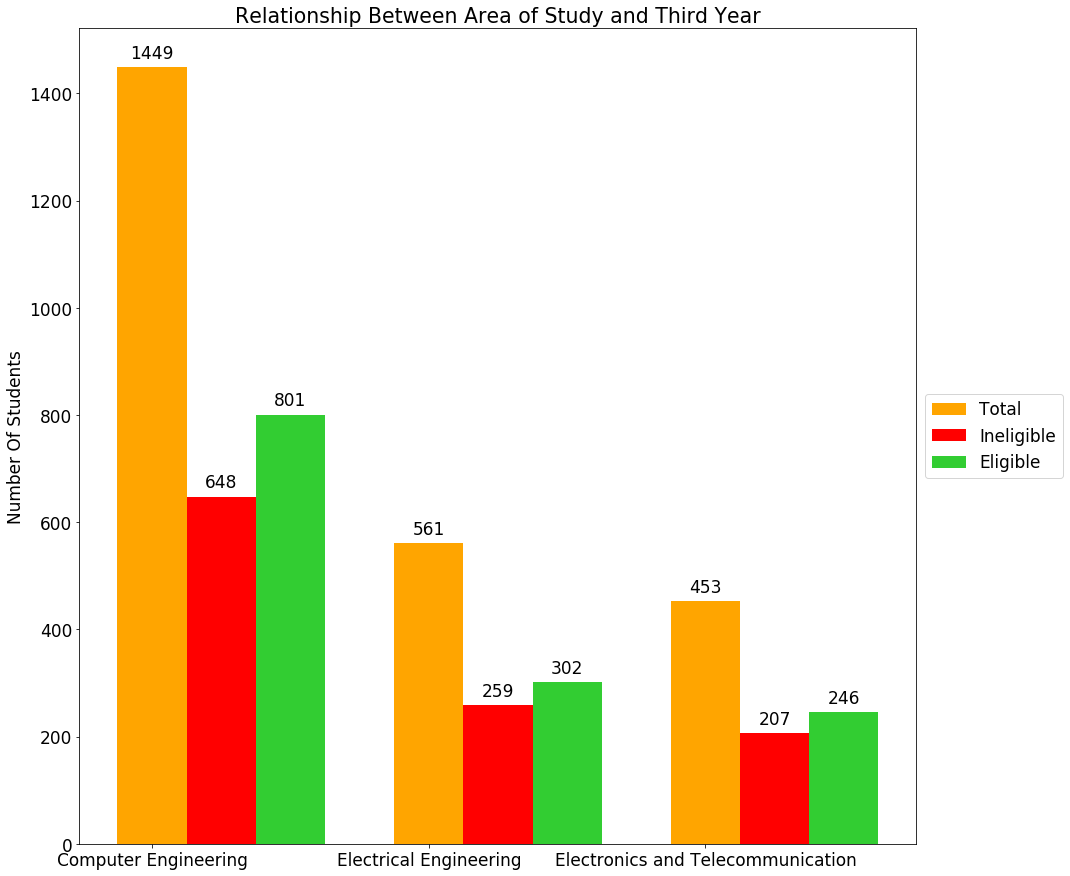

In [31]:
# Selecting Third Year Students from dataframe
Third = major_area[major_area["Current Year"] == '3rd Year']

# Calculating total number of third year students in 'Computer Engineering'
total_comp = Third[Third["Area of Study"]=="Computer Engineering"]["City"].sum()

# Calculating total number of third year students in 'Electrical Engineering'
total_elec = Third[Third["Area of Study"]=="Electrical Engineering"]["City"].sum()

# Calculating total number of third year students in 'Electronics and Telecommunication'
total_extc = Third[Third["Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

# Plotting results obtained using a bar graph
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 15,15
plt.rcParams.update({'font.size': 17})

# Defining labels for x axis
labels=Third["Area of Study"].unique()

# Defining the label locations
x = np.arange(len(labels))  

# Defining width of the bars
width = 0.25  

# Defining y axis values for each group
y1 = Third[Third["Label"] == 0]["City"]
y2 = Third[Third["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]

# Plotting bar graph for all three groups
rects3 = ax.bar(x , y3, width, label='Total',align='center',color='orange')
rects1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='red')
rects2 = ax.bar(x + 0.5 , y2, width, label='Eligible',align='center',color='limegreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Relationship Between Area of Study and Third Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Attaching text to each group
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot9c.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

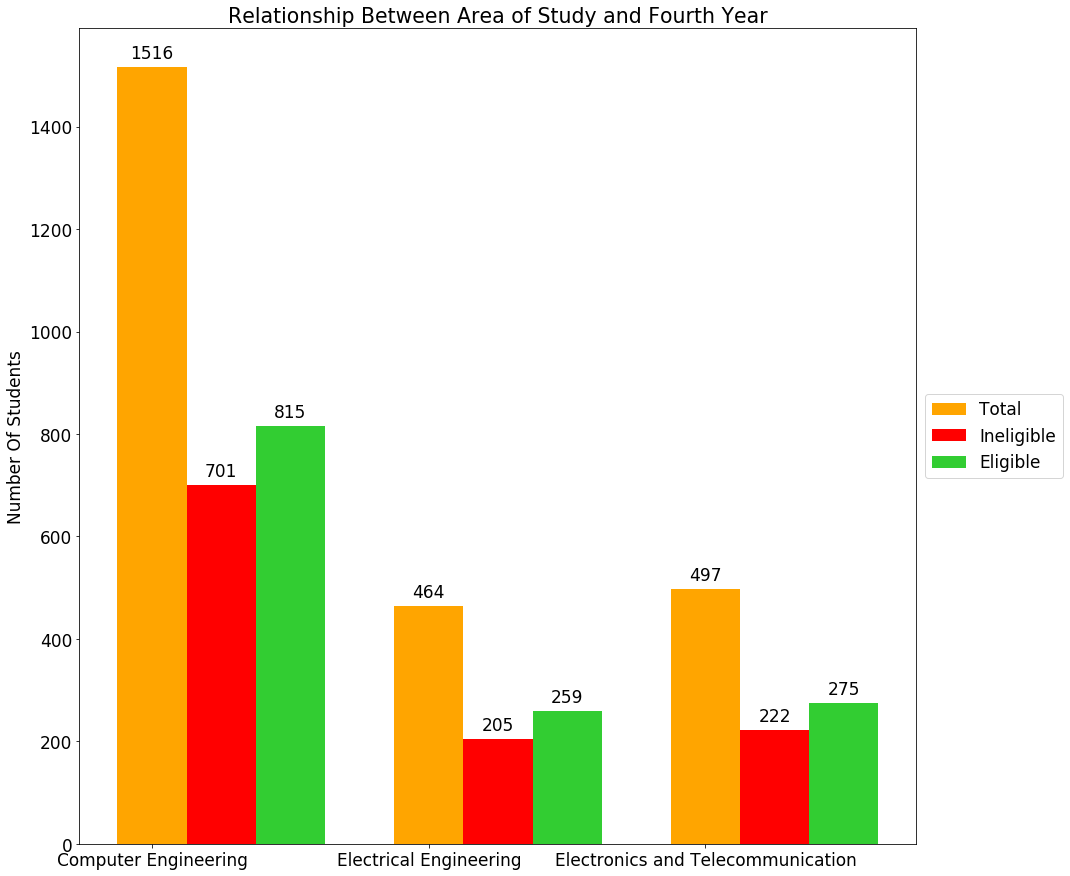

In [32]:
# Selecting Fourth Year Students from dataframe
Fourth = major_area[major_area["Current Year"] == '4th Year']

# Calculating total number of fourth year students in 'Computer Engineering'
total_comp = Fourth[Fourth["Area of Study"]=="Computer Engineering"]["City"].sum()

# Calculating total number of fourth year students in 'Electrical Engineering'
total_elec = Fourth[Fourth["Area of Study"]=="Electrical Engineering"]["City"].sum()

# Calculating total number of fourth year students in 'Electronics and Telecommunication'
total_extc = Fourth[Fourth["Area of Study"]=="Electronics and Telecommunication"]["City"].sum()

# Plotting results obtained using a bar graph
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 15,15
plt.rcParams.update({'font.size': 17})

# Defining labels for x axis
labels=Fourth["Area of Study"].unique()

# Defining the label locations
x = np.arange(len(labels))  

# Defining width of the bars
width = 0.25  

# Defining y axis values for each group
y1 = Fourth[Fourth["Label"] == 0]["City"]
y2 = Fourth[Fourth["Label"] == 1]["City"]
y3 = [total_comp,total_elec,total_extc]

# Plotting bar graph for all three groups
rects3 = ax.bar(x , y3, width, label='Total',align='center',color='orange')
rects1 = ax.bar(x + 0.25 , y1, width, label='Ineligible',align='center',color='red')
rects2 = ax.bar(x + 0.5 , y2, width, label='Eligible',align='center',color='limegreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Students')
ax.set_title('Relationship Between Area of Study and Fourth Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Attaching text to each group
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Exporting the obtained visualization as pdf
pp = PdfPages('plot9d.pdf')
pp.savefig(bbox_inches="tight",pad_inches=2)
plt.show()
plt.close()
pp.close()

# Identifying The Best Binary Classifier To Classify Data Into Eligible And Ineligible

In [33]:
# Listing the features required for building model
required_features = ['CGPA','Current Year',"Written communication skills","Verbal communication skills",'Area of Study']

# Defining X by extracting required features from the dataset
X = df [required_features].copy()

# Categorical encoding 
X['Current Year'] = X['Current Year'].replace({'First-year':1, 'Second-year':2, 'Third-year':3, 'Fourth-year':4})
X['Area of Study'] = X['Area of Study'].replace({'Computer Engineering':1, 'Electrical Engineering':2, 'Electronics and Telecommunication':3})

# Defining y as the 'Label' column of the dataset
y = df['Label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
# Creating a SVM Classifier model
svm_model = svm.SVC()

# Defining list of evaluation metrics  
scoring = ['accuracy', 'precision' , 'recall','f1']

# Computing cross-validated metrics
scores = cross_validate(svm_model,X_train,y_train,scoring=scoring,cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
svm_fit_time = scores['fit_time'].mean()
svm_score_time = scores['score_time'].mean()
svm_accuracy = scores['test_accuracy'].mean()
svm_precision = scores['test_precision'].mean()
svm_recall = scores['test_recall'].mean()
svm_f1 = scores['test_f1'].mean()

In [35]:
# Creating a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()

# Computing cross-validated metrics
scores = cross_validate(decision_tree,X_train,y_train,scoring=scoring,cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision'].mean()
dtree_recall = scores['test_recall'].mean()
dtree_f1 = scores['test_f1'].mean()

In [36]:
# Creating a Decision Tree Classifier model
logistic_regression = LogisticRegression()

# Computing cross-validated metrics
scores = cross_validate(logistic_regression,X_train,y_train,scoring=scoring,cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1'].mean()

In [37]:
# Creating a Random Forest Classifier model
random_forest = RandomForestClassifier()

# Computing cross-validated metrics
scores = cross_validate(random_forest,X_train,y_train,scoring=scoring,cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
rforest_fit_time = scores['fit_time'].mean()
rforest_score_time = scores['score_time'].mean()
rforest_accuracy = scores['test_accuracy'].mean()
rforest_precision = scores['test_precision'].mean()
rforest_recall = scores['test_recall'].mean()
rforest_f1 = scores['test_f1'].mean()

In [38]:
# Creating a K-Neighbors Classifier model
KNN = KNeighborsClassifier()

# Computing cross-validated metrics
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision'].mean()
KNN_recall = scores['test_recall'].mean()
KNN_f1 = scores['test_f1'].mean()

In [39]:
# Creating a Naive Bayes Classifier model
naive_bayes = GaussianNB()

# Computing cross-validated metrics
scores = cross_validate(naive_bayes, X_train, y_train, scoring=scoring, cv=20)

# Sorting the obtained scores dictionary
sorted(scores.keys())

# Storing each required evaluation metrics for comparison
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision'].mean()
bayes_recall = scores['test_recall'].mean()
bayes_f1 = scores['test_f1'].mean()

In [40]:
# Creating dataframe for model comparison
models_comparison = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine','Random Forest', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, svm_fit_time, rforest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, svm_score_time, rforest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, svm_accuracy, rforest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, svm_precision, rforest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, svm_recall, rforest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, svm_f1, rforest_f1, KNN_f1, bayes_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

# Sorting dataframe based on model accuracy
models_comparison = models_comparison.sort_values(by='Accuracy', ascending=False)
models_comparison

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
1,Decision Tree,0.027333,0.010744,1.000000,1.000000,1.000000,1.000000
3,Random Forest,0.704496,0.036729,1.000000,1.000000,1.000000,1.000000
4,K-Nearest Neighbors,0.043224,0.050122,0.975714,0.959561,0.982156,0.970649
2,Support Vector Machine,1.166931,0.046024,0.943571,0.948821,0.911149,0.929380
5,Naive Bayes,0.008645,0.009495,0.860000,0.915119,0.724382,0.808195
0,Logistic Regression,0.109737,0.008945,0.767571,0.730804,0.683461,0.705762
